# Regression with Perceptron

<a name='1'></a>
## 1 - Simple Linear Regression


<a name='1.1'></a>
### 1.1 - Simple Linear Regression Model

You can describe a simple linear regression model as

$$\hat{y} = wx + b,\tag{1}$$

where $\hat{y}$ is a prediction of dependent variable $y$ based on independent variable $x$ using a line equation with the slope $w$ and intercept $b$. 

Given a set of training data points $(x_1, y_1)$, ..., $(x_m, y_m)$, you will find the "best" fitting line - such parameters $w$ and $b$ that the differences between original values $y_i$ and predicted values $\hat{y}_i = wx_i + b$ are minimum.

<a name='1.2'></a>
### 1.2 - Neural Network Model with a Single Perceptron and One Input Node

The simplest neural network model that describes the above problem can be realized by using one **perceptron**. The **input** and **output** layers will have one **node** each ($x$ for input and $\hat{y} = z$ for output):

<img src="images/nn_model_linear_regression_simple.png" style="width:400px;">

**Weight** ($w$) and **bias** ($b$) are the parameters that will get updated when you **train** the model. They are initialized to some random values or set to 0 and updated as the training progresses.

For each training example $x^{(i)}$, the prediction $\hat{y}^{(i)}$ can be calculated as:

\begin{align}
z^{(i)} &=  w x^{(i)} + b,\\
\hat{y}^{(i)} &= z^{(i)},
\tag{2}\end{align}

where $i = 1, \dots, m$.

You can organise all training examples as a vector $X$ of size ($1 \times m$) and perform scalar multiplication of $X$ ($1 \times m$) by a scalar $w$, adding $b$, which will be broadcasted to a vector of size ($1 \times m$):

\begin{align}
Z &=  w X + b,\\
\hat{Y} &= Z,
\tag{3}\end{align}

This set of calculations is called **forward propagation**.

For each training example you can measure the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives. To compare the resulting vector of the predictions $\hat{Y}$ ($1 \times m$) with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.\tag{4}$$

This function is called the sum of squares **cost function**. The aim is to optimize the cost function during the training, which will minimize the differences between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$.

When your weights were just initialized with some random values, and no training was done yet, you can't expect good results. You need to calculate the adjustments for the weight and bias, minimizing the cost function. This process is called **backward propagation**. 

According to the gradient descent algorithm, you can calculate partial derivatives as:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial w } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right).
\tag{5}\end{align}

You can see how the additional division by $2$ in the equation $(4)$ helped to simplify the results of the partial derivatives. Then update the parameters iteratively using the expressions

\begin{align}
w &= w - \alpha \frac{\partial \mathcal{L} }{ \partial w },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b },
\tag{6}\end{align}

where $\alpha$ is the learning rate. Then repeat the process until the cost function stops decreasing.

The general **methodology** to build a neural network is to:
1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation (calculate the perceptron output),
    - Implement backward propagation (to get the required corrections for the parameters),
    - Update parameters.
4. Make predictions.

You often build helper functions to compute steps 1-3 and then merge them into one function `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

In [1]:
# 1. Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3) 

In [2]:
# 1. Load data from a CSV file
path = "D:/4. MACHINE LEARNING/Data/tvmarketing.csv"
adv = pd.read_csv(path)
adv.head()  # Display the first few rows of the DataFrame

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: title={'center': 'TV Advertising vs Sales'}, xlabel='TV', ylabel='Sales'>

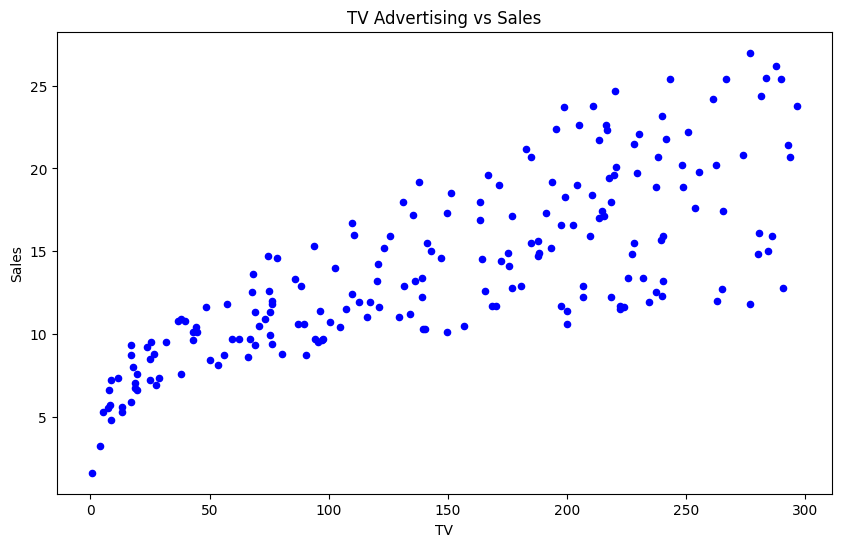

In [3]:
adv.plot(x='TV', y='Sales', kind='scatter', figsize=(10, 6), color='blue', title='TV Advertising vs Sales')

In [4]:
np.mean(adv, axis = 0)

TV       147.0425
Sales     14.0225
dtype: float64

In [5]:
np.std(adv)

c:\Users\admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


TV       85.639332
Sales     5.204397
dtype: float64

<Axes: xlabel='TV', ylabel='Sales'>

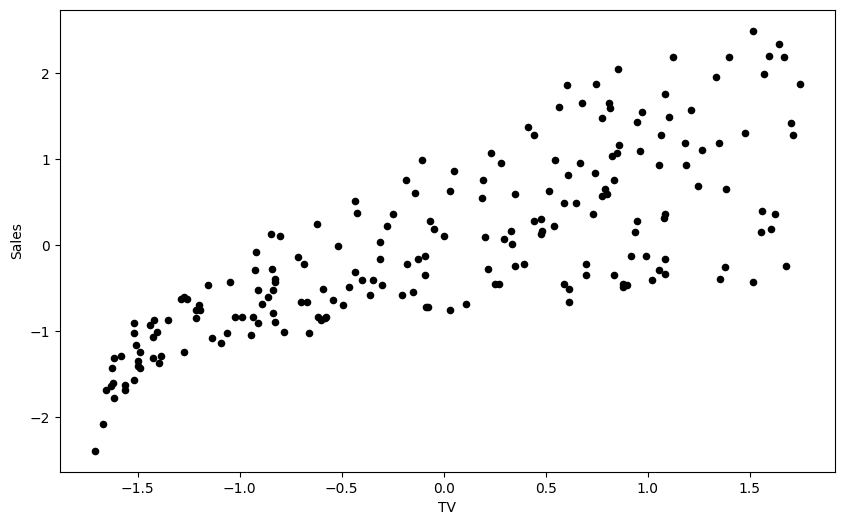

In [6]:
# Normalisation of the data
adv_norm = (adv - np.mean(adv, axis = 0))/np.std(adv)
adv_norm.plot(x='TV', y='Sales', kind='scatter', figsize = (10, 6), c='black')

In [7]:
X_norm = adv_norm['TV']
Y_norm = adv_norm['Sales']

X_norm = np.array(X_norm).reshape((1, len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1, len(Y_norm)))

print ('The shape of X_norm: ' + str(X_norm.shape))
print ('The shape of Y_norm: ' + str(Y_norm.shape))
print ('I have m = %d training examples!' % (X_norm.shape[1]))

The shape of X_norm: (1, 200)
The shape of Y_norm: (1, 200)
I have m = 200 training examples!


<a name='2'></a>
## 2 - Implementation of the Neural Network Model for Linear Regression

Setup the neural network in a way which will allow to extend this simple case of a model with a single perceptron and one input node to more complicated structures later.

<a name='2.1'></a>
### 2.1 - Defining the Neural Network Structure

In [8]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_y)

(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


<a name='2.2'></a>
### 2.2 - Initialize the Model's Parameters

In [9]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """
    
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[0.01788628]]
b = [[0.]]


<a name='2.3'></a>
### 2.3 - The Loop

Implement `forward_propagation()`:
\begin{align}
Z &=  w X + b\\
\hat{Y} &= Z,
\end{align}

In [10]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    Y_hat -- The output
    """
    W = parameters["W"]
    b = parameters["b"]
    
    # Forward Propagation to calculate Z.
    Z = np.matmul(W, X) + b
    Y_hat = Z

    return Y_hat

Y_hat = forward_propagation(X_norm, parameters)

print("Some elements of output vector Y_hat:", Y_hat[0, 0:5])

Some elements of output vector Y_hat: [ 0.01734705 -0.02141661 -0.02711838  0.00093098  0.00705046]


Your weights were just initialized with some random values, so the model has not been trained yet. 

Define a cost function which will be used to train the model:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [11]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares
    
    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    
    """
    # Number of examples.
    m = Y_hat.shape[1]

    # Compute the cost function.
    cost = np.sum((Y_hat - Y)**2)/(2*m)
    
    return cost

print("cost = " + str(compute_cost(Y_hat, Y_norm)))

cost = 0.4861688708015972


Calculate partial derivatives as shown :

\begin{align}
\frac{\partial \mathcal{L} }{ \partial w } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right).
\end{align}

In [12]:
def backward_propagation(Y_hat, X, Y):
    """
    Implements the backward propagation, calculating gradients
    
    Arguments:
    Y_hat -- the output of the neural network of shape (n_y, number of examples)
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # Backward propagation: calculate partial derivatives denoted as dW, db for simplicity. 
    dZ = Y_hat - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    
    grads = {"dW": dW,
             "db": db}
    
    return grads

grads = backward_propagation(Y_hat, X_norm, Y_norm)

print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))

dW = [[-0.76433814]]
db = [[1.86517468e-16]]


Update parameters as shown :

\begin{align}
w &= w - \alpha \frac{\partial \mathcal{L} }{ \partial w },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b }.
\end{align}


In [13]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- python dictionary containing parameters 
    grads -- python dictionary containing gradients 
    learning_rate -- learning rate parameter for gradient descent
    
    Returns:
    parameters -- python dictionary containing updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    
    # Retrieve each gradient from the dictionary "grads".
    dW = grads["dW"]
    db = grads["db"]
    
    # Update rule for each parameter.
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters_updated = update_parameters(parameters, grads)

print("W updated = " + str(parameters_updated["W"]))
print("b updated = " + str(parameters_updated["b"]))

W updated = [[0.93509205]]
b updated = [[-2.23820962e-16]]


In [14]:

def nn_model(X, Y, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    parameters = initialize_parameters(n_x, n_y)
    costs = []  # To store the cost at each iteration
    # Loop
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "Y_hat".
        Y_hat = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "Y_hat, Y". Outputs: "cost".
        cost = compute_cost(Y_hat, Y)
        
        # Backpropagation. Inputs: "Y_hat, X, Y". Outputs: "grads".
        grads = backward_propagation(Y_hat, X, Y)
    
        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        # Append the cost to the list of costs.
        costs.append(cost)
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters, costs

In [15]:
parameters_simple, costs = nn_model(X_norm, Y_norm, num_iterations=30, learning_rate=1.2, print_cost=True)
print (parameters)
print("W = " + str(parameters_simple["W"]))
print("b = " + str(parameters_simple["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

Cost after iteration 0: 0.496595
Cost after iteration 1: 0.206164
Cost after iteration 2: 0.194547
Cost after iteration 3: 0.194082
Cost after iteration 4: 0.194063
Cost after iteration 5: 0.194063
Cost after iteration 6: 0.194062
Cost after iteration 7: 0.194062
Cost after iteration 8: 0.194062
Cost after iteration 9: 0.194062
Cost after iteration 10: 0.194062
Cost after iteration 11: 0.194062
Cost after iteration 12: 0.194062
Cost after iteration 13: 0.194062
Cost after iteration 14: 0.194062
Cost after iteration 15: 0.194062
Cost after iteration 16: 0.194062
Cost after iteration 17: 0.194062
Cost after iteration 18: 0.194062
Cost after iteration 19: 0.194062
Cost after iteration 20: 0.194062
Cost after iteration 21: 0.194062
Cost after iteration 22: 0.194062
Cost after iteration 23: 0.194062
Cost after iteration 24: 0.194062
Cost after iteration 25: 0.194062
Cost after iteration 26: 0.194062
Cost after iteration 27: 0.194062
Cost after iteration 28: 0.194062
Cost after iteration 29:

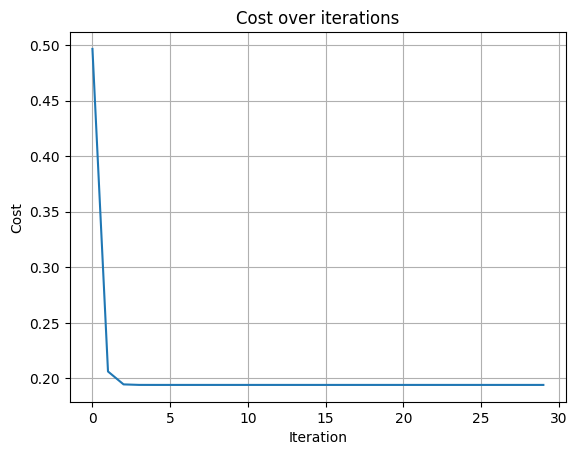

In [16]:
# Plot the cost function
plt.plot(np.arange(0, 30), costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost over iterations")
plt.grid(True)
plt.show()

In [17]:
def predict(X, Y, parameters, X_pred):
    
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    
    # Use the same mean and standard deviation of the original training array X.
    if isinstance(X, pd.Series):
        X_mean = np.mean(X)
        X_std = np.std(X)
        X_pred_norm = ((X_pred - X_mean)/X_std).reshape((1, len(X_pred)))
    else:
        X_mean = np.array(np.mean(X)).reshape((len(X.axes[1]),1))
        X_std = np.array(np.std(X)).reshape((len(X.axes[1]),1))
        X_pred_norm = ((X_pred - X_mean)/X_std)
    # Make predictions.
    Y_pred_norm = np.matmul(W, X_pred_norm) + b
    # Use the same mean and standard deviation of the original training array Y.
    Y_pred = Y_pred_norm * np.std(Y) + np.mean(Y)
    
    return Y_pred[0]

X_pred = np.array([50, 120, 280])
Y_pred = predict(adv["TV"], adv["Sales"], parameters_simple, X_pred)
print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales:\n{Y_pred}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales:
[ 9.40942557 12.7369904  20.34285287]


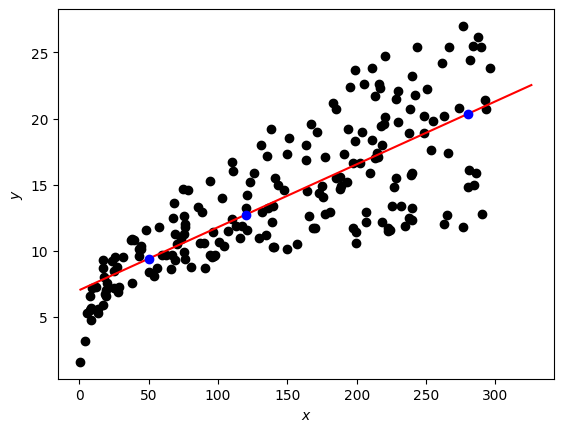

In [18]:
fig, ax = plt.subplots()
plt.scatter(adv["TV"], adv["Sales"], color="black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(adv["TV"]),np.max(adv["TV"])*1.1, 0.1)
Y_line = predict(adv["TV"], adv["Sales"], parameters_simple, X_line)
ax.plot(X_line, Y_line, "r")
ax.plot(X_pred, Y_pred, "bo")
plt.plot()
plt.show()